In [18]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
df = pd.read_csv("HIV_AIDS prevalence estimates table.csv", encoding='latin1')  # or try 'ISO-8859-1'

In [26]:
df.head()

,Country/Region,Adult prevalence of HIV/AIDS,Number of people with HIV/AIDS,Annual deaths from HIV/AIDS,Year of estimate
0,ÿEswatini,28.30%,"240,000","3,000",2024
1,ÿLesotho,26.20%,"445,000","7,000",2025
2,ÿBotswana,22.80%,"399,100","5,275",2025
3,ÿZimbabwe,22.10%,"1,660,000","25,600",2024
4,ÿSouth Africa,14.40%,"9,400,000","80,000",2025


In [27]:
df.tail()

,Country/Region,Adult prevalence of HIV/AIDS,Number of people with HIV/AIDS,Annual deaths from HIV/AIDS,Year of estimate
188,ÿAndorra,-,600,-,2025
189,ÿFederated States of Micronesia,-,149,-,2025
190,ÿJordan,-,"2,000",-,2025
191,ÿLuxembourg,-,"5,700",-,2025
192,ÿMaldives,-,660,-,2025


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country/Region                  193 non-null    object
 1   Adult prevalence of HIV/AIDS    193 non-null    object
 2   Number of people with HIV/AIDS  192 non-null    object
 3   Annual deaths from HIV/AIDS     193 non-null    object
 4   Year of estimate                193 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


In [30]:
df.describe()

,Country/Region,Adult prevalence of HIV/AIDS,Number of people with HIV/AIDS,Annual deaths from HIV/AIDS,Year of estimate
count,193,193,192,193,193
unique,193,73,168,56,16
top,ÿEswatini,-,"11,000",-,2024
freq,1,53,6,126,57


In [31]:
df.isnull().sum()

Country/Region                    0
Adult prevalence of HIV/AIDS      0
Number of people with HIV/AIDS    1
Annual deaths from HIV/AIDS       0
Year of estimate                  0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.shape

(193, 5)

In [34]:
df.dtypes

Country/Region                    object
Adult prevalence of HIV/AIDS      object
Number of people with HIV/AIDS    object
Annual deaths from HIV/AIDS       object
Year of estimate                  object
dtype: object

In [35]:
df.columns

Index(['Country/Region', 'Adult prevalence of HIV/AIDS',
       'Number of people with HIV/AIDS', 'Annual deaths from HIV/AIDS',
       'Year of estimate'],
      dtype='object')

In [36]:
df.columns = [
    'Country',             
    'Prevalence_Rate',    
    'People_with_HIV',     
    'Annual_Deaths',      
    'Year'              
]

In [37]:
def clean_numeric(col):
    return (
        df[col]
        .astype(str)
        .str.replace(r'\[.*?\]', '', regex=True)  
        .str.replace(',', '', regex=False)        
        .str.replace('%', '', regex=False)        
        .str.replace('–', '', regex=False)        
        .str.replace('…', '', regex=False)        
        .str.replace('-', '', regex=False)        
        .str.replace(' ', '', regex=False)
        .str.replace(r'\[.*?\]', '', regex=True)  
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .replace(['', 'nan', '-', '…'], np.nan) 
        .replace(['', 'nan'], np.nan)             
        .astype(float)                            
    )

In [38]:
df['Prevalence_Rate'] = clean_numeric('Prevalence_Rate')
df['People_with_HIV'] = clean_numeric('People_with_HIV')
df['Annual_Deaths'] = clean_numeric('Annual_Deaths')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [39]:
df = df.dropna(subset=['People_with_HIV', 'Prevalence_Rate', 'Annual_Deaths', 'Year'])

In [40]:
df['Death_Rate_%'] = (df['Annual_Deaths'] / df['People_with_HIV']) * 100

In [41]:
# Data Visualization
print(df.columns.tolist())

['Country', 'Prevalence_Rate', 'People_with_HIV', 'Annual_Deaths', 'Year', 'Death_Rate_%']


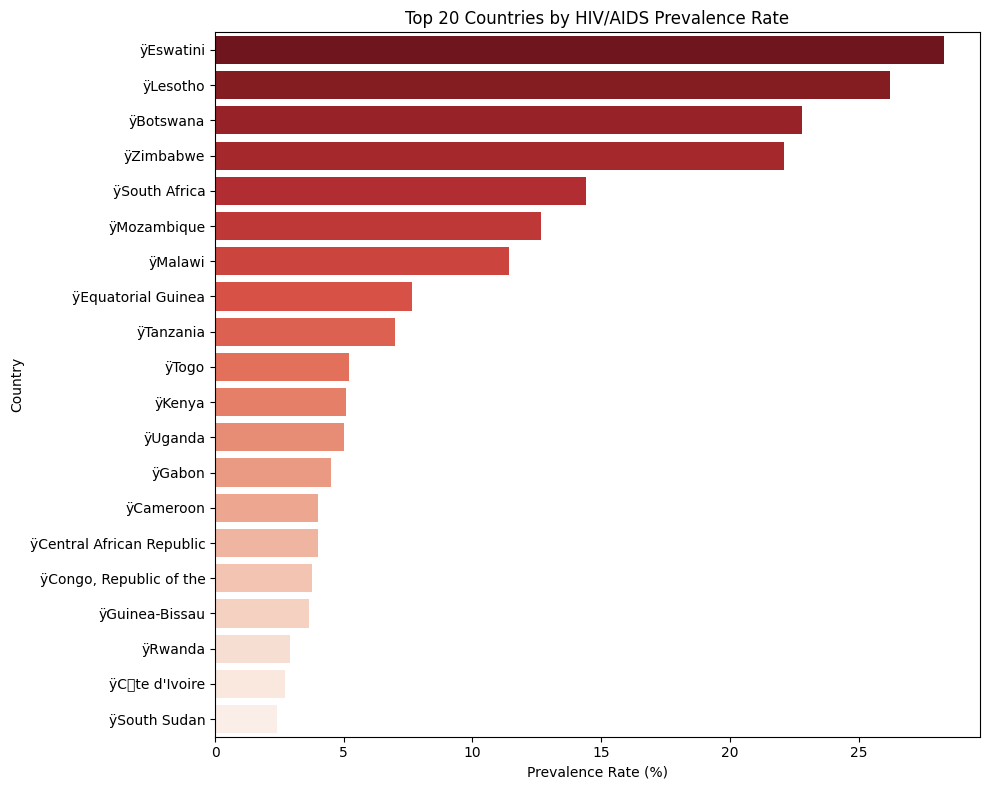

In [42]:
# Sort by prevalence and plot
top_prevalence = df.sort_values(by='Prevalence_Rate', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_prevalence, y='Country', x='Prevalence_Rate', palette='Reds_r')
plt.title('Top 20 Countries by HIV/AIDS Prevalence Rate')
plt.xlabel('Prevalence Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

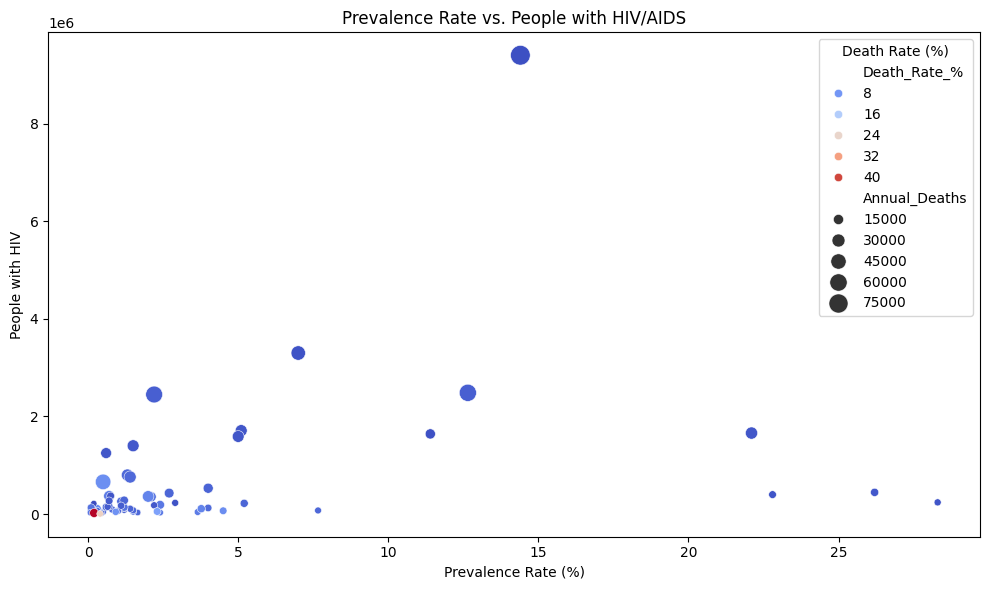

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Prevalence_Rate', y='People_with_HIV',
                size='Annual_Deaths', hue='Death_Rate_%', palette='coolwarm', sizes=(20, 200))

plt.title('Prevalence Rate vs. People with HIV/AIDS')
plt.xlabel('Prevalence Rate (%)')
plt.ylabel('People with HIV')
plt.legend(title='Death Rate (%)')
plt.tight_layout()
plt.show()

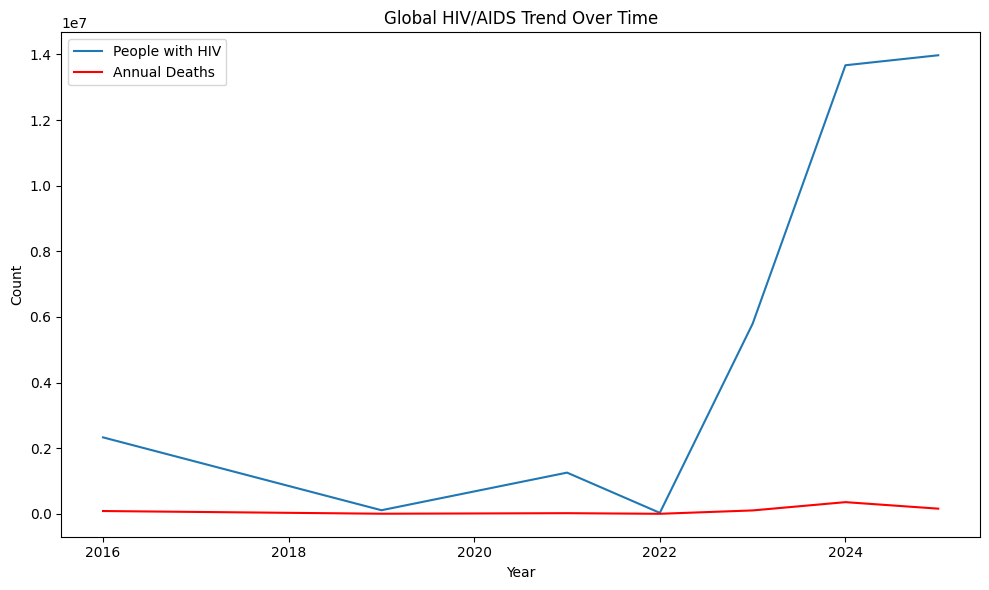

In [44]:
yearly = df.groupby('Year')[['People_with_HIV', 'Annual_Deaths']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly, x='Year', y='People_with_HIV', label='People with HIV')
sns.lineplot(data=yearly, x='Year', y='Annual_Deaths', label='Annual Deaths', color='red')
plt.title('Global HIV/AIDS Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

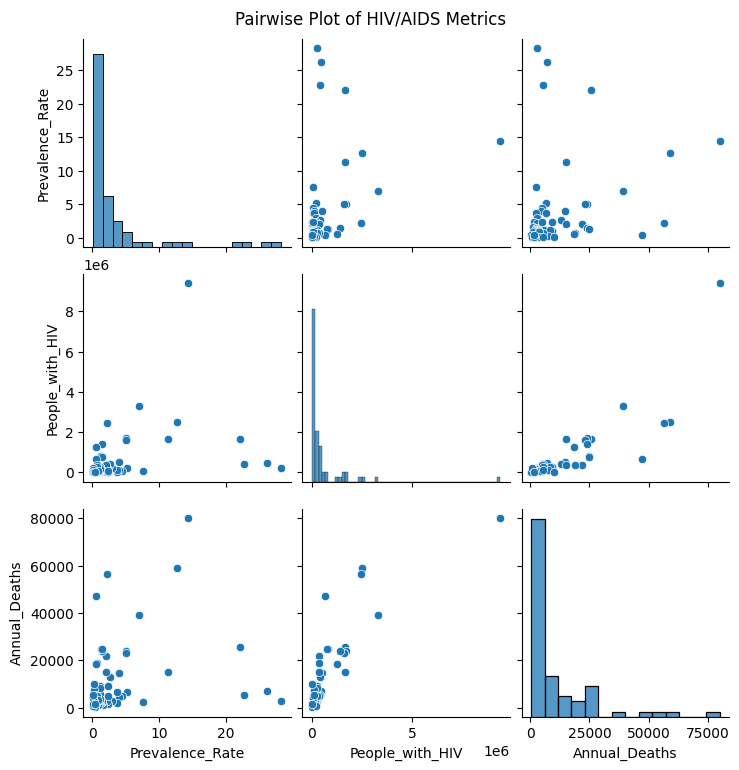

In [45]:
sns.pairplot(df[['Prevalence_Rate', 'People_with_HIV', 'Annual_Deaths']])
plt.suptitle('Pairwise Plot of HIV/AIDS Metrics', y=1.02)
plt.show()

In [46]:
# Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Optional: Encode country if needed
le = LabelEncoder()
df['Country_Code'] = le.fit_transform(df['Country'])

# Define threshold (e.g. top 25% death rates are "high")
threshold = df['Death_Rate_%'].quantile(0.75)
df['High_Death_Rate'] = (df['Death_Rate_%'] >= threshold).astype(int)

# Features and target
X = df[['Prevalence_Rate', 'People_with_HIV', 'Annual_Deaths', 'Year', 'Country_Code']]
y = df['High_Death_Rate']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    print(f"\n🔍 {model_name} Accuracy: {acc:.2f}%")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


🔍 Logistic Regression Accuracy: 76.92%


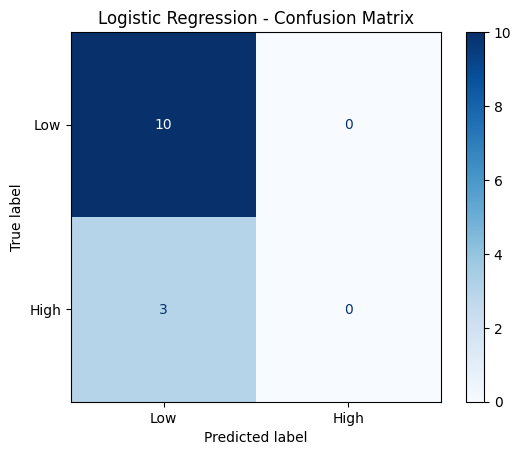


🔍 K-Nearest Neighbors Accuracy: 76.92%


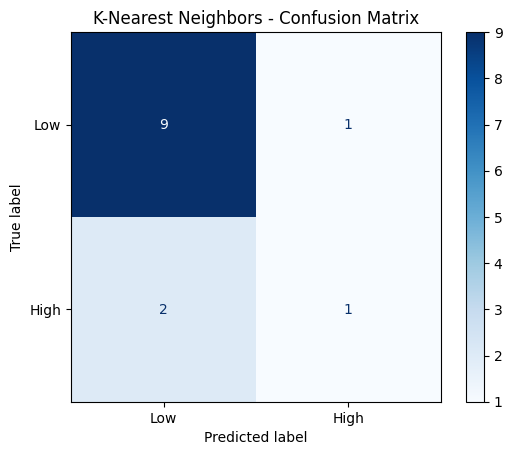


🔍 Random Forest Accuracy: 100.00%


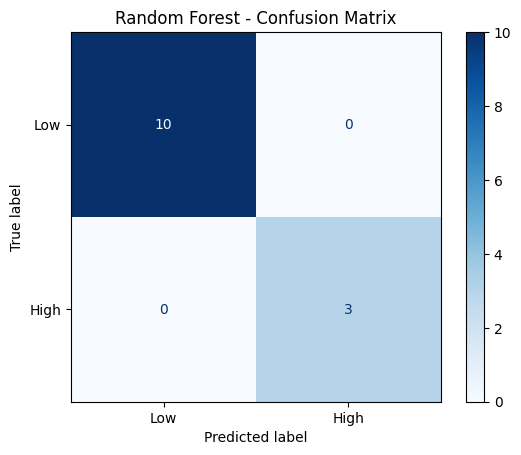


🔍 Support Vector Machine Accuracy: 76.92%


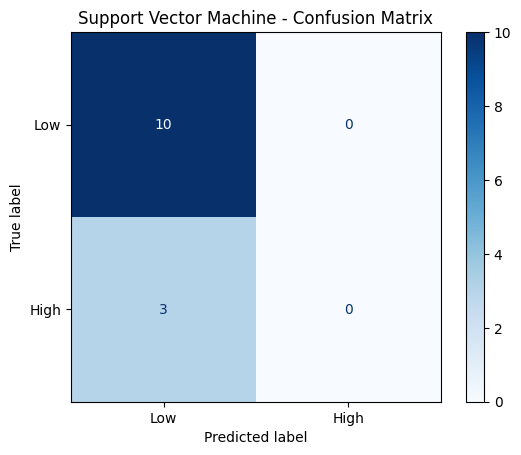


🔍 Naive Bayes Accuracy: 61.54%


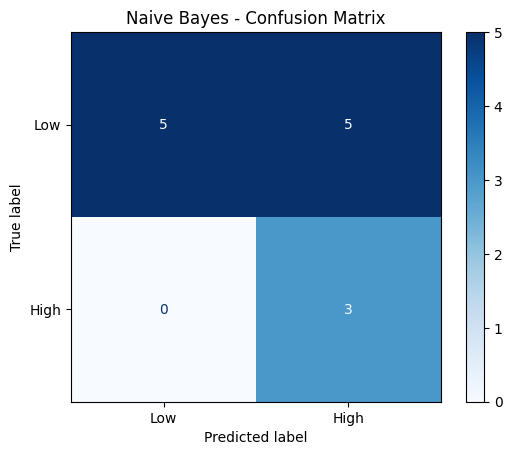


🔍 Decision Tree Accuracy: 92.31%


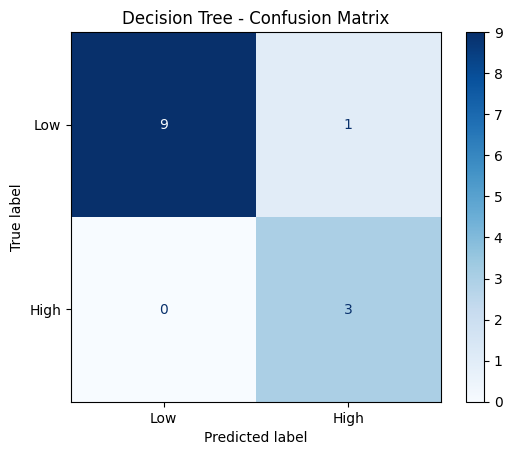

In [50]:
models = [
    (LogisticRegression(), "Logistic Regression"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (RandomForestClassifier(), "Random Forest"),
    (SVC(), "Support Vector Machine"),
    (GaussianNB(), "Naive Bayes"),
    (DecisionTreeClassifier(), "Decision Tree"),
]

for model, name in models:
    train_and_evaluate(model, name)

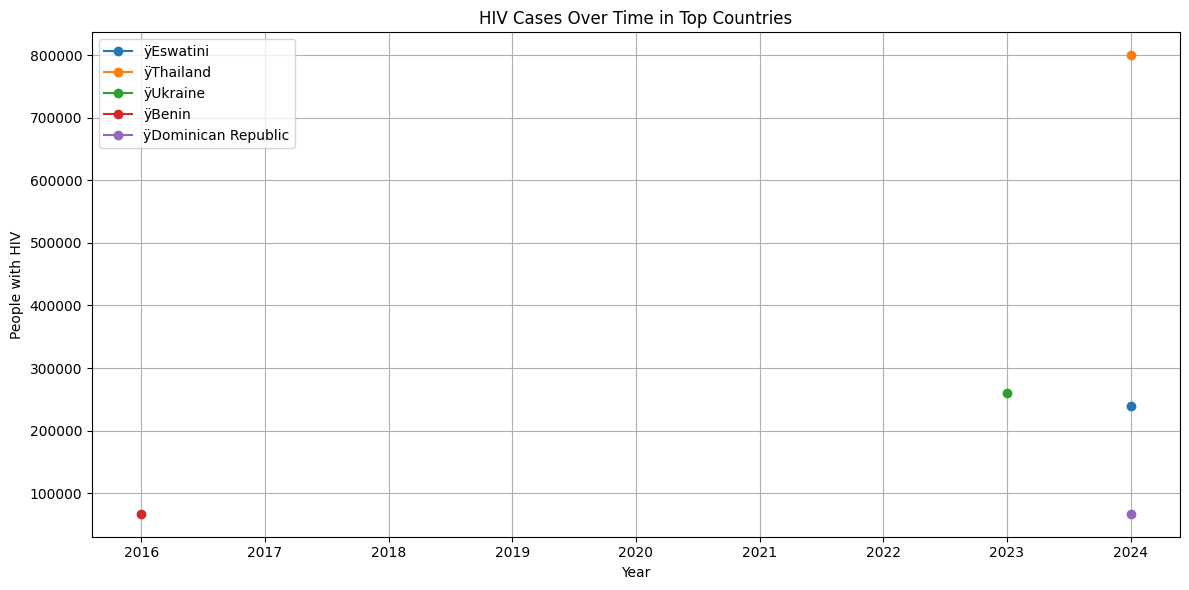

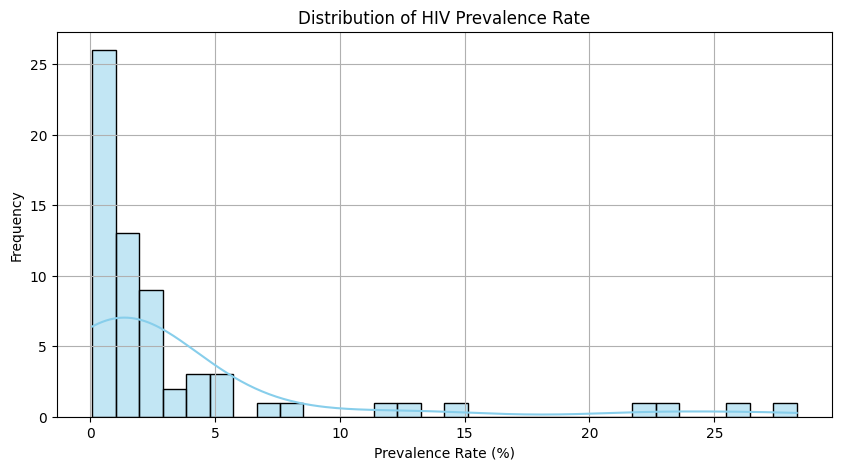

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df['Prevalence_Rate'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of HIV Prevalence Rate")
plt.xlabel("Prevalence Rate (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [56]:
# Create bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(df_top10 country['Country'], df_top10['Number of people with HIV/AIDS'], color='purple')
plt.xlabel('Number of People with HIV/AIDS')
plt.title('Top 10 Countries by HIV/AIDS Population')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add number labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100000, bar.get_y() + bar.get_height() / 2,
             f'{width:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

NameError: name 'df_top10' is not defined

<Figure size 1200x800 with 0 Axes>